# K-means Clustering: Danceability vs Energy 

**Importing Relevant Libraries**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


**Loading Data**

In [2]:
spotify_df = pd.read_csv("Spotify.csv")

**Assessing Data for determination of number of clusters**

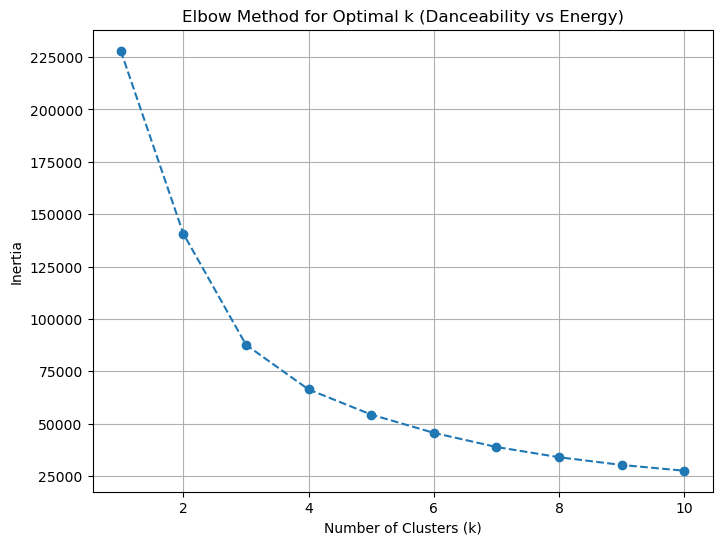

In [3]:
# 1. Prepare Data for 'danceability' and 'energy'

X = spotify_df[['danceability', 'energy']]

# 2. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Elbow Method
inertia = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 4. Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Danceability vs Energy)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


**Applying K-means Clustering (danceability vs energy)**

Number of records in each cluster:
| cluster   | count   |
|:----------|:--------|
| 1         | 50587   |
| 0         | 35943   |
| 2         | 27470   |

Percentage of records in each cluster:
| cluster   | count   |
|:----------|:--------|
| 1         | 44.3746 |
| 0         | 31.5289 |
| 2         | 24.0965 |


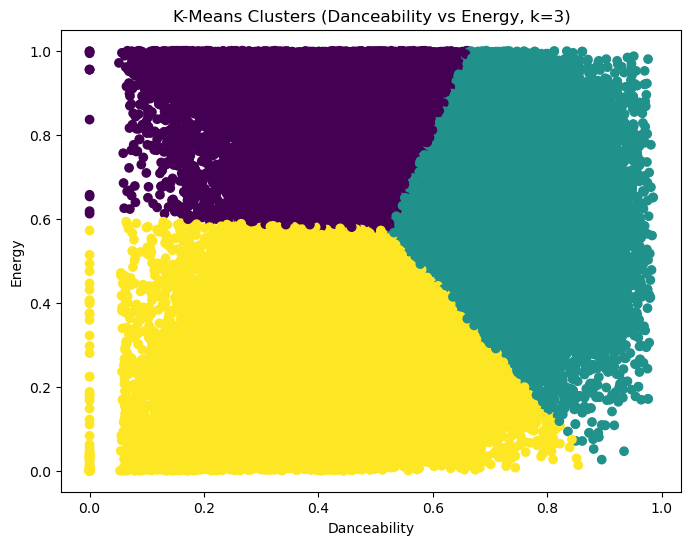

In [4]:
# 5. Apply K-Means clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = spotify_df.copy() # Create a copy to hold cluster labels
cluster_labels['cluster'] = kmeans.labels_

# 6. Get record counts and percentages
cluster_counts = cluster_labels['cluster'].value_counts()
cluster_percentages = (cluster_counts / len(cluster_labels)) * 100

# 7. Print the results
print(f"Number of records in each cluster:\n{cluster_counts.to_markdown(numalign='left', stralign='left')}")
print(f"\nPercentage of records in each cluster:\n{cluster_percentages.to_markdown(numalign='left', stralign='left')}")

# 8. Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x=cluster_labels['danceability'], y=cluster_labels['energy'], c=cluster_labels['cluster'], cmap='viridis')
plt.title('K-Means Clusters (Danceability vs Energy, k=3)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

# K-means Clustering: Danceability vs Valence

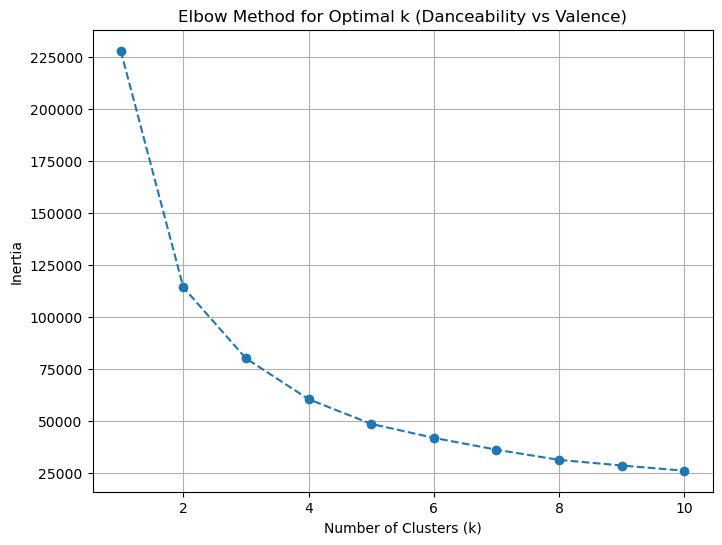

In [5]:
# 9. Elbow Method for Danceability vs Valence
X_dv = spotify_df[['danceability', 'valence']]
scaler_dv = StandardScaler()
X_scaled_dv = scaler_dv.fit_transform(X_dv)

inertia_dv = []
for k in range(1, 11):
    kmeans_dv = KMeans(n_clusters=k, random_state=42)
    kmeans_dv.fit(X_scaled_dv)
    inertia_dv.append(kmeans_dv.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_dv, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Danceability vs Valence)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


**Applying K-means Clustering (danceability vs valence)**


K-Means Clustering Results (Danceability vs Valence):
Number of records in each cluster:
| cluster_dv   | count   |
|:-------------|:--------|
| 1            | 44543   |
| 2            | 39285   |
| 0            | 30172   |

Percentage of records in each cluster:
| cluster_dv   | count   |
|:-------------|:--------|
| 1            | 39.0728 |
| 2            | 34.4605 |
| 0            | 26.4667 |


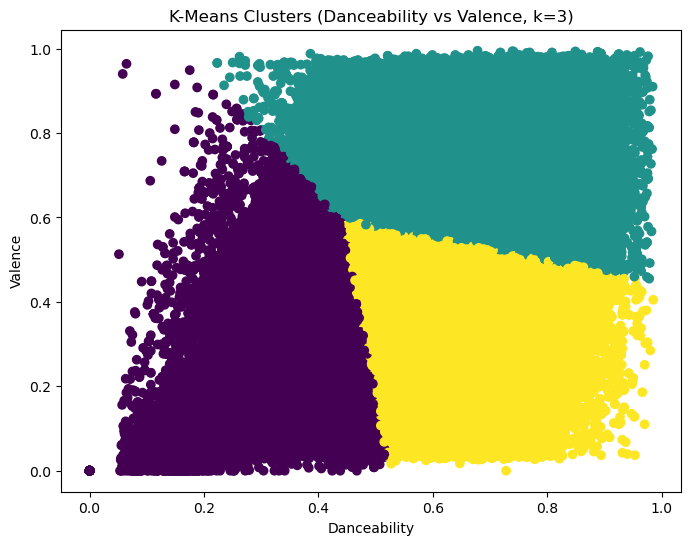

In [6]:
# 10. K-Means Clustering for Danceability vs Valence
k_dv = 3 
kmeans_dv = KMeans(n_clusters=k_dv, random_state=42)
kmeans_dv.fit(X_scaled_dv)
cluster_labels_dv = spotify_df.copy()  # Create a copy to hold cluster labels for this analysis
cluster_labels_dv['cluster_dv'] = kmeans_dv.labels_

# 11. Get record counts and percentages for Danceability vs Valence
cluster_counts_dv = cluster_labels_dv['cluster_dv'].value_counts()
cluster_percentages_dv = (cluster_counts_dv / len(cluster_labels_dv)) * 100

# 12. Print the results for Danceability vs Valence
print("\nK-Means Clustering Results (Danceability vs Valence):")
print(f"Number of records in each cluster:\n{cluster_counts_dv.to_markdown(numalign='left', stralign='left')}")
print(f"\nPercentage of records in each cluster:\n{cluster_percentages_dv.to_markdown(numalign='left', stralign='left')}")

# 13. Visualize the clusters for Danceability vs Valence
plt.figure(figsize=(8, 6))
plt.scatter(x=cluster_labels_dv['danceability'], y=cluster_labels_dv['valence'], c=cluster_labels_dv['cluster_dv'], cmap='viridis')
plt.title('K-Means Clusters (Danceability vs Valence, k=3)')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.show()

# Interpretation

**K-Means Clustering: Danceability vs. Energy**

Cluster 0: Contains 35,943 records, representing 31.53% of the data.
Cluster 1: Contains the highest number of records, with 50,587 (44.37%).
Cluster 2: Holds 27,470 records, which is 24.10% of the data.
This distribution suggests that a plurality of songs exhibit the Danceability and Energy characteristics associated with Cluster 1. Cluster 0 has a substantial portion of songs, while Cluster 2 has the fewest.

**K-Means Clustering: Danceability vs. Valence**

Cluster 0: Contains 30,172 records (26.47%).
Cluster 1: Contains 44,543 records (39.07%).
Cluster 2: Contains 39,285 records (34.46%).
Here, Cluster 1 again has the most songs. The songs are more evenly distributed across the three clusters in this analysis compared to the Danceability vs. Energy clustering.

**Overall Interpretation**

The clustering of Danceability and Energy shows that Cluster 1 contains the most records in both scenarios.